## Prevendo a Ocorrência de Diabetes

## Conjunto de Dados do Repositório de Machine Learning da UCI / Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import imblearn
from imblearn.over_sampling import SMOTE
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, 

In [2]:
# Loading dataset
df = pd.read_csv("pima-data.csv")

# Shaping
df.shape

(768, 10)

In [3]:
# Dataset info
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
# Verifying nule values
df.isnull().values.any()

False

In [5]:
# Checking Single Values
df.nunique()

num_preg         17
glucose_conc    136
diastolic_bp     47
thickness        51
insulin         186
bmi             248
diab_pred       517
age              52
skin             51
diabetes          2
dtype: int64

In [6]:
# Normalizing data
X = df.iloc[:, 0:9]  
y = df.iloc[:, 9]
df_norm = (X - X.mean()) / (X.max() - X.min())
df_norm.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,0.126762,0.136208,0.023726,0.146096,-0.094326,0.023956,0.066236,0.279319,0.146096
1,-0.167356,-0.180375,-0.025455,0.085490,-0.094326,-0.080366,-0.051612,-0.037348,0.085490
2,0.244409,0.312088,-0.041848,-0.207439,-0.094326,-0.129547,0.085450,-0.020681,-0.207439
3,-0.167356,-0.160274,-0.025455,0.024884,0.016785,-0.058012,-0.130178,-0.204015,0.024884
4,-0.226180,0.080932,-0.238569,0.146096,0.104256,0.165535,0.775458,-0.004015,0.146096


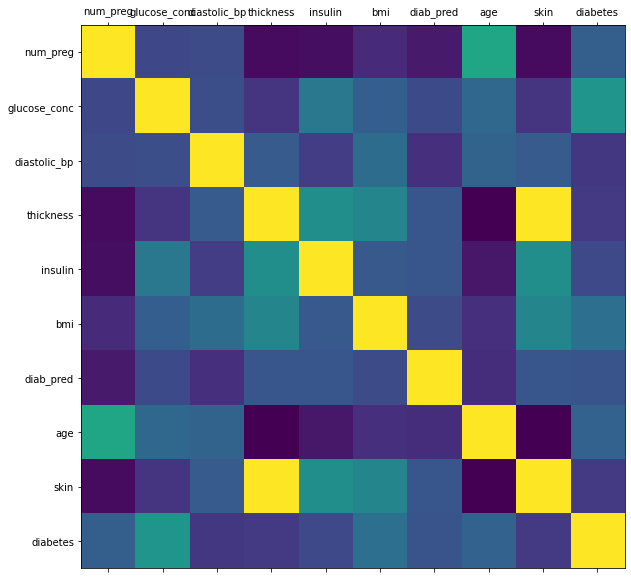

In [7]:
# Correlation between the variables
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)

In [29]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [8]:
# Class definition
diabetes_map = {True : 1, False : 0}
df_norm['diabetes'] = df['diabetes'].map(diabetes_map)
df_norm.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,0.126762,0.136208,0.023726,0.146096,-0.094326,0.023956,0.066236,0.279319,0.146096,1
1,-0.167356,-0.180375,-0.025455,0.085490,-0.094326,-0.080366,-0.051612,-0.037348,0.085490,0
2,0.244409,0.312088,-0.041848,-0.207439,-0.094326,-0.129547,0.085450,-0.020681,-0.207439,1
3,-0.167356,-0.160274,-0.025455,0.024884,0.016785,-0.058012,-0.130178,-0.204015,0.024884,0
4,-0.226180,0.080932,-0.238569,0.146096,0.104256,0.165535,0.775458,-0.004015,0.146096,1


## Balancing the data

In [9]:
# Checking if the target variable is balanced
target_count = df_norm.diabetes.value_counts()
target_count

0    500
1    268
Name: diabetes, dtype: int64

In [113]:
# SMOTE
smote_bal = SMOTE()

X = df_norm.iloc[:, 0:9]
y = df_norm.iloc[:, 9]
X_res, y_res = smote_bal.fit_resample(X, y)

In [11]:
# Analysing the distribuition data
num_true = len(df_norm.loc[df_norm['diabetes'] == True])
num_false = len(df_norm.loc[df_norm['diabetes'] == False])
print("Number of True Cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False Cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Number of True Cases: 268 (34.90%)
Number of False Cases: 500 (65.10%)


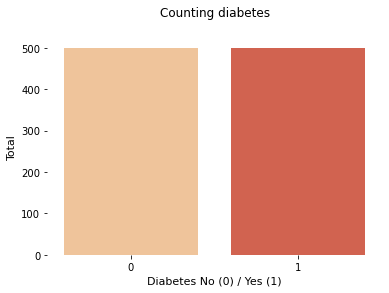

In [12]:
# Plot 
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Diabetes No (0) / Yes (1)', fontsize = 11)
plt.ylabel('Total', fontsize = 11)
plt.title('Counting diabetes\n')
plt.show()

## Spliting data

70% --> train data

30% --> test data

In [114]:
# Feature Selection
atributes = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
X_res = X_res[atributes].values

In [79]:
# Defining the Split Rate
split_test_size = 0.30

In [115]:
# Creating train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size = split_test_size, random_state = 42)

## Hidden Missing Values

In [36]:
# Verifying if exist missing values
df_norm.isnull().values.any()

False

In [54]:
print("# Lines in the dataframe {0}".format(len(df_norm)))
print("# Lines missing glucose_conc: {0}".format(len(df_norm.loc[df_norm['glucose_conc'] == 0])))
print("# Lines missing diastolic_bp: {0}".format(len(df_norm.loc[df_norm['diastolic_bp'] == 0])))
print("# Lines missing thickness: {0}".format(len(df_norm.loc[df_norm['thickness'] == 0])))
print("# Lines missing insulin: {0}".format(len(df_norm.loc[df_norm['insulin'] == 0])))
print("# Lines missing bmi: {0}".format(len(df_norm.loc[df_norm['bmi'] == 0])))
print("# Lines missing age: {0}".format(len(df_norm.loc[df_norm['age'] == 0])))

# Lines in the dataframe 768
# Lines missing glucose_conc: 0
# Lines missing diastolic_bp: 0
# Lines missing thickness: 0
# Lines missing insulin: 0
# Lines missing bmi: 0
# Lines missing age: 0


## Dealing with Missing Data
Replacing the values equal to zero with the average of the data

In [116]:
# Creating object
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Replacing the "0" by the average of the data
X_train = preenche_0.fit_transform(X_train)
X_test = preenche_0.fit_transform(X_test)

## Building and training the model - Naive Bayes

In [117]:
# Trainning the model - model_v1
model_v1 = GaussianNB()
model_v1.fit(X_train, Y_train.ravel())

GaussianNB()

In [118]:
## Accurancy the model - train data
nb_predict_train = model_v1.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, nb_predict_train)))
print()

Accuracy: 0.7314



In [119]:
## Accurancy the model - test data
nb_predict_test = model_v1.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, nb_predict_test)))
print()

Accuracy: 0.7600



In [42]:
# Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_test, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_test, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 99  52]
 [ 36 113]]

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.66      0.69       151
           0       0.68      0.76      0.72       149

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



## Building and training the model - RandomForest

In [120]:
# Trainning the model - model_v2
model_v2 = RandomForestClassifier(random_state = 42)
model_v2.fit(X_train, Y_train.ravel())

RandomForestClassifier(random_state=42)

In [121]:
## Accurancy the model - train data
rf_predict_train = model_v2.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, rf_predict_train)))

Accuracy: 1.0000


In [122]:
## Accurancy the model - test data
rf_predict_test = model_v2.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, rf_predict_test)))
print()

Accuracy: 0.7967



In [46]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_test, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_test, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[119  32]
 [ 35 114]]

Classification Report
              precision    recall  f1-score   support

           1       0.77      0.79      0.78       151
           0       0.78      0.77      0.77       149

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



## Building and training the model - Logistic Regression

In [123]:
# Trainning the model - model_v3
model_v3 = LogisticRegression(C = 0.7, random_state = 42)
model_v3.fit(X_train, Y_train.ravel())
lr_predict_test = model_v3.predict(X_test)

In [124]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_test, lr_predict_test, labels = [1, 0]))

Accuracy: 0.7733

Classification Report
              precision    recall  f1-score   support

           1       0.77      0.79      0.78       151
           0       0.78      0.76      0.77       149

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [49]:
### Resumindo
## Exatidão nos dados de teste

# Modelo usando algoritmo Naive Bayes         = 0.7367
# Modelo usando algoritmo Random Forest       = 0.8033
# Modelo usando algoritmo Regressão Logística = 0.7333

## Predictions with the Trainned Model

In [126]:
result1 = model_v2.predict(X_test[15].reshape(1, -1))
result2 = model_v2.predict(X_test[18].reshape(1, -1))
print(result1)
print(result2)

[1]
[1]


# End